## Introduction

In 2016, it was estimated that the number of books sold in one year stands at around 2.2 billion copies. Currently, Google estimates are that there are around 129,864,880 published books in the world at this moment. Therefore book selling has the potential to be a very lucrative business - whether this be online or in a book store.

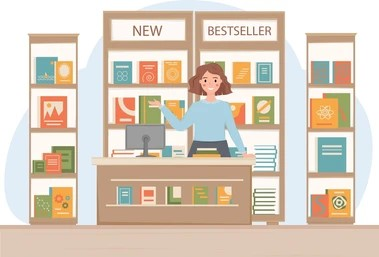

I will take a sample of data containing information about the sales, ratings and publication of a selection of books. From this I aim to identify how we can determine which books generate the most sales, and therefore which books would be the best for a book seller to stock and prioritise in their marketing.

## Data Source Information
Data taken from https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

The dataset contains information about the sales, ratings and publication of 1070 books. 

Key Question to explore:
Which books generate the most sales?

Context:
This information could be used to make data-driven decisions about which books to stock more of in order to sell more and increase profits. It could be used to market specific books and to determine which authors or publishers to work with.

Sub-Questions:
- Is there a correlation between the price of books and the number of sales?
- Do more expensive books generate more gross sales than cheaper ones? How many cheap books would you need to stock to make the same as selling one expensive one?
- Which publishers sell the most books? Does this differ for fiction and non-fiction books?
- We would expect more highly rated books to sell more - is this true?
- Is there a correlation between author rating and the average rating of the book among readers?
- Does year of publication have an effect on sales figures? Do newer books tend to sell more units?

## Reading Data in DataFrame

In [338]:
import pandas as pd
df = pd.read_csv('Books_Data.csv')

In [340]:
# Display the first 5 rows of the DataFrame
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [341]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

## Data Cleaning and Pre-Processing

- Remove unnecessary columns
- Check for missing values and handle them appropriately
- Change data type in Publishing Year columm from float to integer
- Change column names for readability and consistency
- Change values in genre column, publisher column and author rating column
- Check for duplicates and remove if necessary
- Create a column to group years

In [344]:
# Remove columns that are not required in this analysis
df = df.drop(['language_code'], axis = 1)

In [346]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values)

index                   0
Publishing Year         1
Book Name              23
Author                  0
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [347]:
# Fill missing title column with unknown (It is useful to retain these columns as they contain author information)
df['Book Name'].fillna("Unknown",inplace=True)

In [349]:
# Drop the one row with missing year value
df.dropna(subset=['Publishing Year'], how='all', inplace=True)

In [352]:
# Change Publishing Year to integer
df['Publishing Year'] = df['Publishing Year'].astype(int)

In [353]:
# Rename columns to make them consistently formatted
df.rename(columns={'Publishing Year':'publishing_year', 'Book Name':'title', 'Author':'author', 'Author_Rating':'author_rating', 'Book_average_rating':'average_rating', 'Book_ratings_count':'ratings_count', 'gross sales':'gross_sales',
                      'publisher revenue':'publisher_revenue', 'sale price':'sale_price', 'sales rank':'sales_rank', 'Publisher ':'publisher', 'units sold':'units_sold'}, inplace=True)

In [354]:
# Replace values in genre as fiction has two different values
# Replace values in publisher as HarperCollins has two different versions of the same 
# Combine two values in author ratings column to make one value of 'Highly acclaimed'
df['genre'] = df['genre'].replace('genre fiction', 'fiction')
df['publisher'] = df['publisher'].replace('HarperCollins Publishing', 'HarperCollins Publishers')
df['author_rating'] = df['author_rating'].replace({'Excellent':'Highly acclaimed', 'Famous':'Highly acclaimed'})

In [359]:
# Check for duplicates
df.duplicated().any()

False

In [360]:
# Create a column to group publishing year into smaller sub-sets that can then be used to filter the data further

# Define a function to group the years
def year_group(year):
    if year < 1900: 
        year_group = 'Pre-1900'
    elif year >= 1900 and year < 1910:
        year_group = '1900-1909'
    elif year >= 1910 and year < 1920:
        year_group = '1910-1919'
    elif year >= 1920 and year < 1930:
        year_group = '1920-1929'
    elif year >= 1930 and year < 1940:
        year_group = '1930-1939'
    elif year >= 1940 and year < 1950:
        year_group = '1940-1949'
    elif year >= 1950 and year < 1960:
        year_group = '1950-1959'
    elif year >= 1960 and year < 1970:
        year_group = '1960-1969'
    elif year >= 1970 and year < 1980:
        year_group = '1970-1979'
    elif year >= 1980 and year < 1990:
        year_group = '1980-1989'
    elif year >= 1990 and year < 2000:
        year_group = '1990-1999'
    elif year >= 2000 and year < 2010:
        year_group = '2000-2009'
    elif year >= 2010 and year < 2020:
        year_group = '2010-2020'
    else:
        year_group = 'Unknown'
    return year_group

# Create a new column by applying the year_group function to the publishing_year column
df['year_category'] = df['publishing_year'].apply(year_group)

## Summary Statistics
- Calculate basic summary statistics such as mean, median, standard deviation, and range for numerical columns
- Calculate count, unique, most common, and frequency of the most common for object columns
- Explore correlations

In [364]:
df.describe()

,index,publishing_year,average_rating,ratings_count,gross_sales,publisher_revenue,sale_price,sales_rank,units_sold
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,534.583723,1971.377923,4.006595,94913.969130,1857.861862,843.771160,4.871319,611.763330,9681.536950
std,309.159198,185.080257,0.247004,31527.713028,3938.558251,2258.596467,3.561121,370.005111,15377.042555
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.000000,1985.000000,3.850000,70382.000000,371.250000,0.000000,1.990000,287.000000,550.000000
50%,535.000000,2003.000000,4.010000,89262.000000,810.840000,272.916000,3.990000,596.000000,3915.000000
75%,802.000000,2010.000000,4.170000,113915.000000,1488.270000,721.554000,6.990000,933.000000,5319.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [365]:
df.describe(include = 'object')

,title,author,author_rating,genre,publisher,year_category
count,1069,1069,1069,1069,1069,1069
unique,1046,734,3,3,8,13
top,Unknown,Stephen King,Intermediate,fiction,"Amazon Digital Services, Inc.",2000-2009
freq,22,29,625,884,600,334


In [368]:
corr = df.select_dtypes(include='number').corr()
corr

,index,publishing_year,average_rating,ratings_count,gross_sales,publisher_revenue,sale_price,sales_rank,units_sold
index,1.000000,0.015993,-0.019471,-0.843416,-0.455609,-0.350794,0.073359,0.999475,0.221939
publishing_year,0.015993,1.000000,0.054553,0.000290,0.008908,0.007629,0.028626,0.016796,-0.015231
average_rating,-0.019471,0.054553,1.000000,0.093393,-0.041751,-0.043192,0.001158,-0.019720,-0.008008
ratings_count,-0.843416,0.000290,0.093393,1.000000,0.502108,0.401299,-0.068651,-0.835535,-0.252287
gross_sales,-0.455609,0.008908,-0.041751,0.502108,1.000000,0.912890,0.272735,-0.442249,-0.150707
publisher_revenue,-0.350794,0.007629,-0.043192,0.401299,0.912890,1.000000,0.313570,-0.340669,-0.116350
sale_price,0.073359,0.028626,0.001158,-0.068651,0.272735,0.313570,1.000000,0.071776,0.004092
sales_rank,0.999475,0.016796,-0.019720,-0.835535,-0.442249,-0.340669,0.071776,1.000000,0.211478
units_sold,0.221939,-0.015231,-0.008008,-0.252287,-0.150707,-0.116350,0.004092,0.211478,1.000000


## Exploratory Data Analysis and Data Visualisation

In [371]:
# Import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Is there a correlation between the price of books and the number of sales?

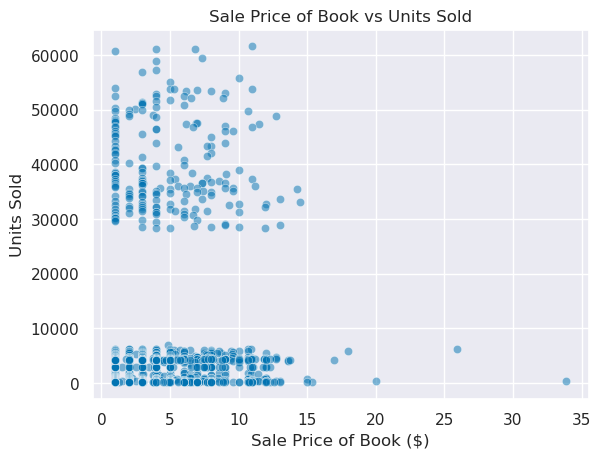

In [374]:
# Create a scatterplot to plot price of books against number of sales

sns.set(palette='colorblind')
sns.scatterplot(data=df, x='sale_price', y='units_sold', alpha=0.5)
plt.title('Sale Price of Book vs Units Sold')
plt.xlabel('Sale Price of Book ($)')
plt.ylabel('Units Sold')
plt.show();

Conclusion: Most books sold have a price point lower than 15, however there does not appear to be a clear correlation between the price of the book and the units sold, until we reach the very high priced outliers which tend to sell less. This is supported by the correlation table above showing the correlation coefficient between the variables as 0.004092.
It is interesting to note the lack of data points between 10000 and 30000. This suggests that there is quite a disparity in volumes sold - a book will either sell under 10000 copies or it will do well and sell over 30000.

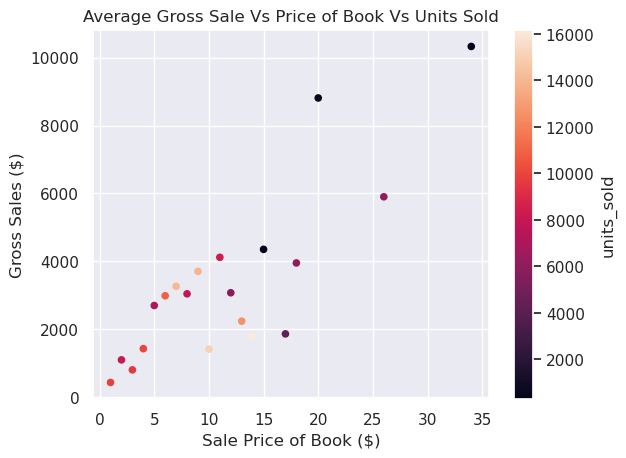

In [377]:
# Calculate the average gross sales for books at each price point (rounded to the nearest whole number)
df['price_rounded']=df['sale_price'].round(0).astype(int)
df_price = df.groupby('price_rounded')[['price_rounded','gross_sales', 'units_sold']].mean()

sns.set(palette='colorblind')
df_price.plot.scatter(x='price_rounded', y='gross_sales', c='units_sold')
plt.title('Average Gross Sale Vs Price of Book Vs Units Sold')
plt.xlabel('Sale Price of Book ($)')
plt.ylabel('Gross Sales ($)')
plt.show();

Conclusion: Higher priced books tend to generate higher gross sales. However, they also tend to sell fewer units. 
It is difficult to come to a conclusion on which books to stock based on their sale price without more information such as profit margins and shelf space. 

How many cheap books would you need to sell to make the same as selling one expensive one?

In [381]:
cheap_book = df_price.loc[df_price['price_rounded']==4]['gross_sales'].values[0]
expensive_book = df_price[df_price['price_rounded']==34]['gross_sales'].values[0]
difference = expensive_book/cheap_book
print(f"To generate the same amount of money you would need to stock {difference:.0f} different $4 books for every 1 $34 dollar book.")

To generate the same amount of money you would need to stock 7 different $4 books for every 1 $34 dollar book.


Which publishers sell the most for fiction and non-fiction books? 
(I have chosen not to look at children's books as the sample size for this is very small)

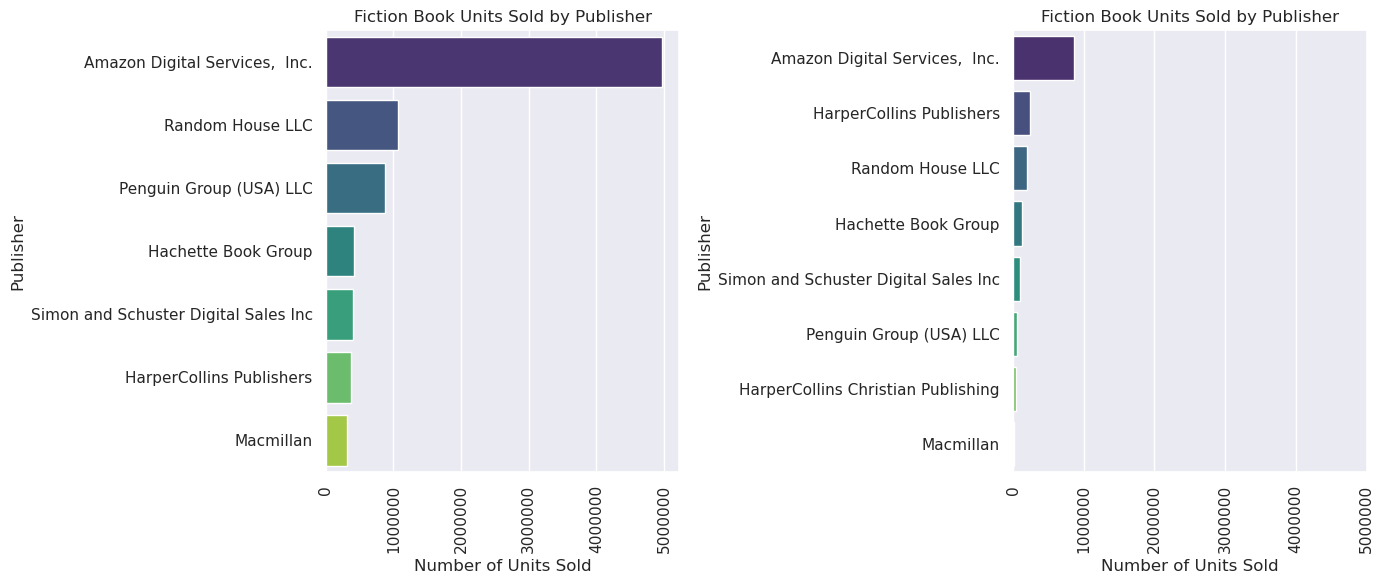

There are a total of 884 fiction books in the dataset and 170 non-fiction books in the dataset


In [384]:
# Create a dataframe for fiction and non-fiction and then group by publisher and sort by the amount of units sold

df_fiction = df[df['genre']=='fiction']
df_nonfiction = df[df['genre']=='nonfiction']

# Number of fiction non-fiction books
fiction_count = len(df_fiction)
non_fiction_count = len(df_nonfiction)

df_pub_fiction =  df_fiction.groupby('publisher')['units_sold'].agg('sum').sort_values(ascending = False)
df_pub_nonfiction =  df_nonfiction.groupby('publisher')['units_sold'].agg('sum').sort_values(ascending = False)

# Display top for each genre using bar charts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_pub_fiction.values, y=df_pub_fiction.index, palette="viridis", ax=ax[0])
ax[0].set_title('Fiction Book Units Sold by Publisher')
ax[0].set_xlabel('Number of Units Sold')
ax[0].set_ylabel('Publisher')
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(x=df_pub_nonfiction.values, y=df_pub_nonfiction.index, palette="viridis", ax=ax[1])
ax[1].set_title('Fiction Book Units Sold by Publisher')
ax[1].set_xlabel('Number of Units Sold')
ax[1].set_ylabel('Publisher')
ax[1].set_xlim(0,5000000)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

print(f"There are a total of {fiction_count} fiction books in the dataset and {non_fiction_count} non-fiction books in the dataset")

Conclusion: It is clear that fiction books sell significantly higher volumes than the non-fiction ones. However, it is also worth noting that this sample contains 884 fiction books and only 170 non-fiction ones so a larger sample size would be needed to make a more definitive analysis and determine how many more fiction books than non-fiction books should be stocked.

In terms of publisher, Amazon Digital Services sells higher amounts of both genres and has a significantly larger market share. It has sold 4.7 times more fiction books than the next highest publisher. Random House is the next best performer when looking at both genres. It seems HarperCollins is better placed in terms of selling non-fiction titles.
It would therefore be advisable for booksellers to work alongside these publishers when looking for which books to stock, and perhaps prioritise these over other publishers. 

Do more highly rated books to sell more units?

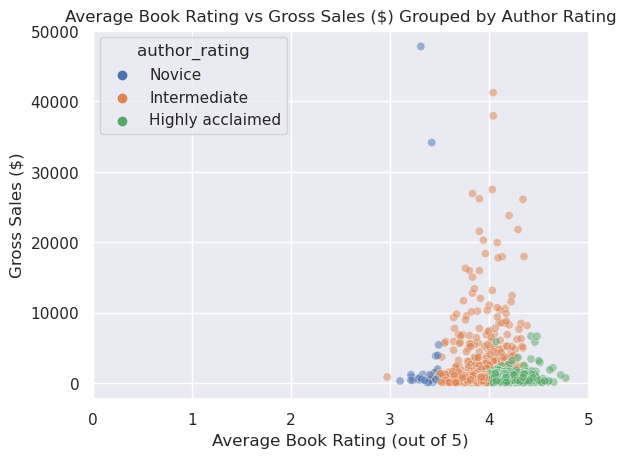

In [397]:
# Create a scatterplot to show book ratings vs units sold

sns.set(palette='deep')
sns.scatterplot(data=df, x='average_rating', y='gross_sales', alpha=0.5, hue='author_rating')
plt.title('Average Book Rating vs Gross Sales ($) Grouped by Author Rating')
plt.xlabel('Average Book Rating (out of 5)')
plt.ylabel('Gross Sales ($)')
plt.xlim(0,5)
plt.show();

Conclusion: 
From this scatter plot we can see that the data is skewed as there are no books that are rated lower than 2.9. Therefore a larger sample size would be needed to come to any conclusions about correlation overall.
We can see however that there does not appear to be any correlation with the highly rated books and how much sales they generate, suggesting reader ratings does not impact the amount of sales. 

Is there a correlation between author rating and the average rating of the book among readers?

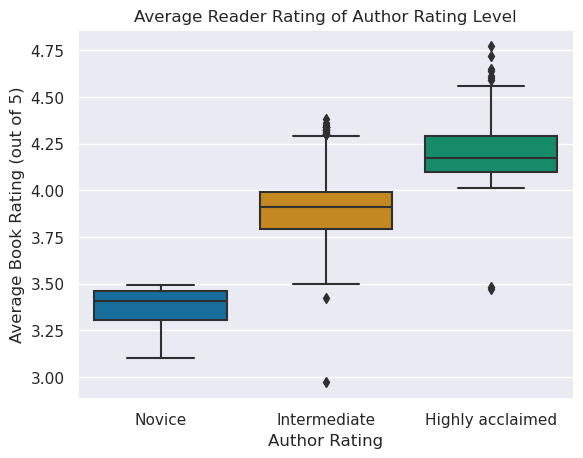

In [400]:
# Create a boxplot to show author rating by 

sns.set(palette='colorblind')
sns.boxplot(data=df, x='author_rating', y='average_rating')
plt.title('Average Reader Rating of Author Rating Level')
plt.xlabel('Author Rating')
plt.ylabel('Average Book Rating (out of 5)')
plt.show();

Conclusion: The author rating is based on their previous works and serves as an indicator of their reputation or acclaim. We can see there is a clear distinction between each of the three groups, with the higher the rating for one correlating with the higher the rating for the other.
We can also see there is a much narrower reader rating range for the Novice authors, who also do not have any outliers. This suggests there is more consensus on the quality of books written by these authors compared to Intermediate and Novice who generate more disparate ratings.

Does year of publication have an effect on sales figures? Do newer books tend to sell more units?

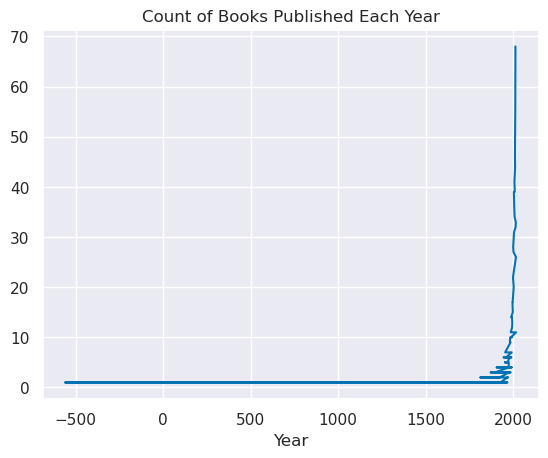

In [405]:
# Examine the dataset to see the trend in numbers published each year

data = df['publishing_year'].value_counts()
data.plot.line(title='Count of Books Published Each Year', xlabel='Year');

There is a huge period where very few books were published, therefore it would be better to use the 'Year Category' column created earlier to focus on books published post-1900.

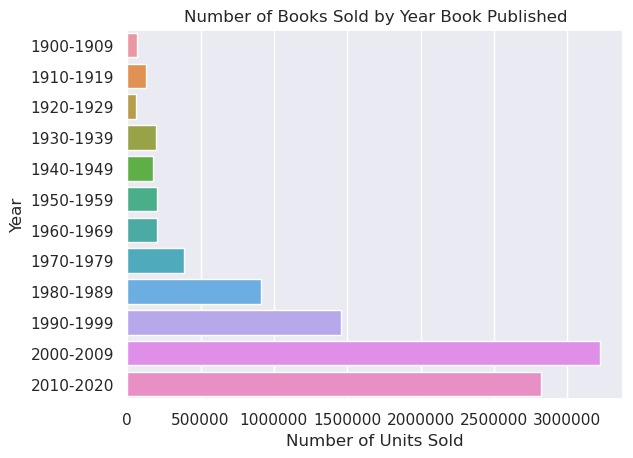

In [408]:
# Create a bar chart showing number of books sold by the year they were published

df_filter = df[df['year_category']!='Pre-1900']
df_years = df_filter.groupby('year_category')['units_sold'].agg('sum')
ax = sns.barplot(x=df_years.values, y=df_years.index)
ax.set_title('Number of Books Sold by Year Book Published')
ax.set_xlabel('Number of Units Sold')
ax.set_ylabel('Year')
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False);


Conclusion: Books published closer to the current date tend to sell best and the number sold increases the later the publishing year. The mostly highly selling decade is books published between 2000 and 2009.
However, it is interesting to note that these has been a decrease sold of books in the most recent decade (The first time the pattern breaks since the 1930s to the 1940s). This could perhaps be as we are only focusing on print books and more modern books tend to be consumed in ebook or audiobook formats. 

## Overall conclusions to be used by book sellers 

- Price point of books should not be used to determine how many should be stocked as there is no direct correlation between the price and the number of units sold.
- Higher priced books tend to generate higher gross sales.
- You would need to stock seven $4 books for every one £34 dollar book.
- Fiction sells significantly higher volumes than the non-fiction ones (although a larger sample size would be needed to confirm this).
- Amazon and Random House are the publishers which sell the most in both non-fiction and fiction genres, with Amazon outperforming significantly.
- There does not appear to be a correlation between reader rating and gross sales, however a larger sample size is needed to test this.
- Author rating tends to correlate with reader ratings, with Highly acclaimed authors receiving higher average ratings.
- Books published closer to the current date tend to sell more. However, there has been a decrease with more recently published books and the reason for this should be explored. 

## Possible Further Exploration

- I would like to combine this data with a larger sample set in order to generate a more accurate analysis and further explore any correlations. 
- The data set does not contain information about profit margins. This information would be useful to see not only how many books were sold in terms of gross sales but how much profit they generate. This would be especially useful to look at if also considering sales of ebooks and audiobooks.
- Book reviews and content are very popular on social media with trends such as Bookstagram and BookTok. It would be interesting to explore data about this alongside sales data to determine if social media is having an impact on sales and popularity of certain books and authors.
- It would be useful to look at demographic data for book sales in order to for book sellers to stock books that appeal to the demographic that is most likely to visit their store.

## References

1. https://wordsrated.com/book-sales-statistics/